In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/KIIT/Desktop/High Radius/Final.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# MILESTONE 1

In [3]:
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,20220101,160023,NR04,787347798,"1065,33",20220107,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,20220102,73006,NR03,795887697,"0,00",20211231,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,20220102,110022,NR04,884689948,"302,85",20220106,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,20220102,130024,NR02,814096053,"8380,69",20220106,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,20220102,133014,NR03,901859762,"545,85",20220107,EUR,64.0,1210183107


In [4]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [5]:
df.shape

(1101925, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [7]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [8]:
df=df.fillna('NaN')
df.isnull().sum()

CUSTOMER_ORDER_ID          0
SALES_ORG                  0
DISTRIBUTION_CHANNEL       0
DIVISION                   0
RELEASED_CREDIT_VALUE      0
PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
CREDIT_CONTROL_AREA        0
SOLD_TO_PARTY              0
ORDER_AMOUNT               0
REQUESTED_DELIVERY_DATE    0
ORDER_CURRENCY             0
CREDIT_STATUS              0
CUSTOMER_NUMBER            0
dtype: int64

In [9]:
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,20220101,160023,NR04,787347798,"1065,33",20220107,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,20220102,73006,NR03,795887697,"0,00",20211231,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,20220102,110022,NR04,884689948,"302,85",20220106,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,20220102,130024,NR02,814096053,"8380,69",20220106,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,20220102,133014,NR03,901859762,"545,85",20220107,EUR,64.0,1210183107


In [10]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
df.head(10)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,2022-01-01,160023,NR04,787347798,"1065,33",2022-01-07,EUR,64.0,1210124309
6,756619705,4269,Bahrain,North-Region,"1974,66",9999,59,2022-01-02,73006,NR03,795887697,"0,00",2021-12-31,RON,93.0,1210109233
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,2022-01-02,110022,NR04,884689948,"302,85",2022-01-06,EUR,64.0,12311152
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,2022-01-02,130024,NR02,814096053,"8380,69",2022-01-06,EUR,NaN,1230021722
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,2022-01-02,133014,NR03,901859762,"545,85",2022-01-07,EUR,64.0,1210183107


In [11]:
(df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum()

27142

In [12]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]
(df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum()

0

In [13]:
df['ORDER_AMOUNT'].str.contains('-').sum()

32

In [14]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace(to_replace = '-',value = '',regex=True)
df['ORDER_AMOUNT'].str.contains('-').sum()

0

In [15]:
df['ORDER_AMOUNT'].str.contains(',').sum()

1073406

In [16]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace(to_replace = ',',value = '.',regex=True)
df['ORDER_AMOUNT'].str.contains(',').sum()

0

In [17]:
(df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()

100437

In [18]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [19]:
conversion_rates = {
    "EUR": 0.93,
    "AUD": 1.53,
    "CAD": 1.36,
    "GBP": 0.81,
    "MYR": 4.59,
    "PLN": 4.19,
    "AED": 3.67,
    "HKD": 7.83,
    "CHF": 0.91,
    "RON": 4.61,
    "SGD": 1.35,
    "CZK": 22.01,
    "HUF": 346.58,
    "NZD": 1.64,
    "BHD": 0.38,
    "SAR": 3.75,
    "QAR": 3.64,
    "KWD": 0.31,
    "SEK": 10.72
}

df["ORDER_AMOUNT"] = pd.to_numeric(df["ORDER_AMOUNT"], errors="coerce")
df["amount_in_usd"] = df.apply(lambda row: row["ORDER_AMOUNT"] / conversion_rates.get(row["ORDER_CURRENCY"], 1), axis=1)
print(df['amount_in_usd'])

0           1026.462366
1            846.623656
2          72573.612903
3           1511.333333
4              0.000000
               ...     
1101920     3270.511111
1101921        0.000000
1101922        0.000000
1101923        0.000000
1101924     3270.511111
Name: amount_in_usd, Length: 1074783, dtype: float64


In [20]:
zero_values = df[df['amount_in_usd'] == 0]
print(zero_values)

         CUSTOMER_ORDER_ID  SALES_ORG DISTRIBUTION_CHANNEL      DIVISION  \
4                930253442       2381               Greece  South-Region   
57               778638920       2373             Thailand  South-Region   
62               870847173       4352               Poland  North-Region   
67               822817658       2491          Netherlands  North-Region   
117              799548044       2849              Belgium  South-Region   
...                    ...        ...                  ...           ...   
1101891          835314074       3410               Taiwan  South-Region   
1101892          958175613       4452           Mauritania  South-Region   
1101921          998890898       4509              Armenia  South-Region   
1101922          983330221       3951                Nepal  South-Region   
1101923          926668029       3235               Panama  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE  \
4                   

In [21]:
df['unique_cust_id'] = df.apply(lambda x : str(x["CUSTOMER_NUMBER"]) + str(x["COMPANY_CODE"]), axis=1)

In [22]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1026.462366,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,846.623656,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72573.612903,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1511.333333,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290


In [23]:
df_m1=df
df_m1.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1026.462366,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,846.623656,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72573.612903,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1511.333333,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290


# MILESTONE 2

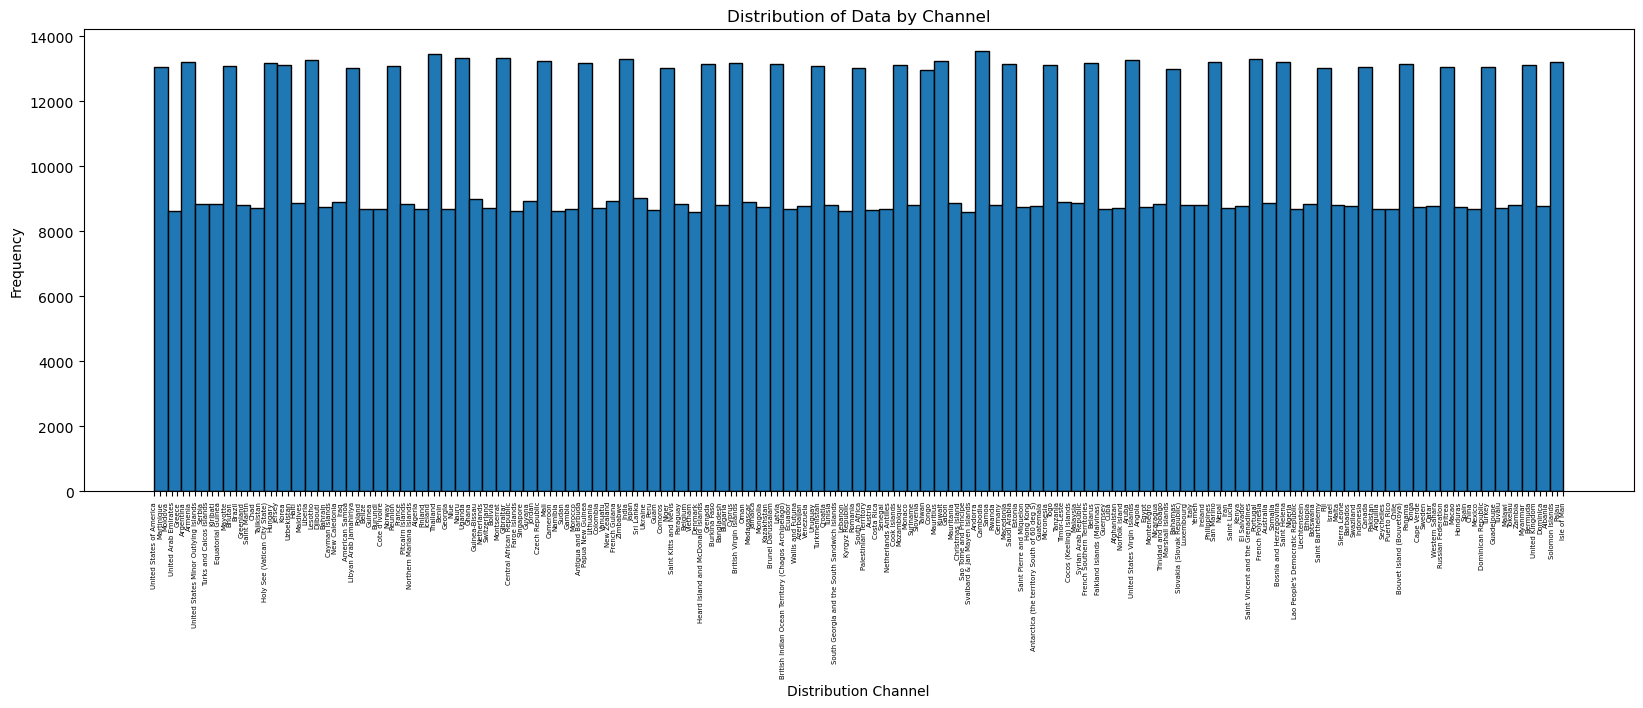

In [24]:
#Create a Histogram on DISTRIBUTION_CHANNEL
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6)) 
plt.hist(df_m1['DISTRIBUTION_CHANNEL'], bins='auto', edgecolor="black")
plt.xlabel('Distribution Channel')
plt.xticks(fontsize=5,rotation=90) 
plt.ylabel('Frequency')
plt.title('Distribution of Data by Channel')
plt.show()

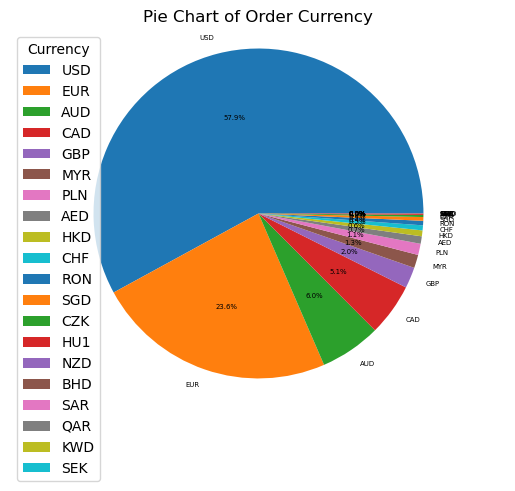

In [25]:
#Create a Pie Chart on ORDER_CURRENCY
currency_counts = df_m1['ORDER_CURRENCY'].value_counts()
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%',textprops={'fontsize': 5}, radius=30)
plt.legend(currency_counts.index, title='Currency', loc='best')
plt.title('Pie Chart of Order Currency')
plt.axis('equal')
plt.show()

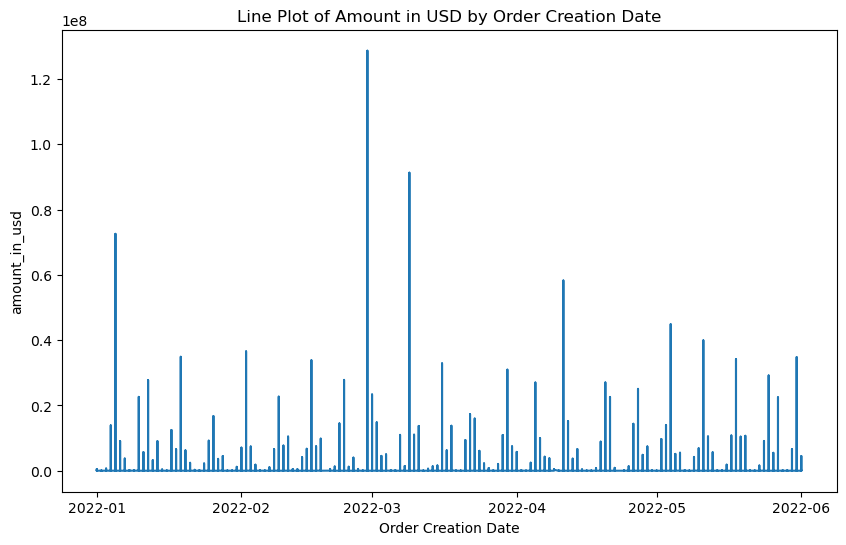

In [26]:
#Create a line plot on ORDER_CREATION_DATE and amount_in_usd
plt.figure(figsize=(10, 6)) 
df_sorted = df_m1.sort_values('ORDER_CREATION_DATE')
plt.plot(df_sorted['ORDER_CREATION_DATE'], df_sorted['amount_in_usd'])
plt.xlabel('Order Creation Date')
plt.ylabel('amount_in_usd')
plt.title('Line Plot of Amount in USD by Order Creation Date')
plt.show()

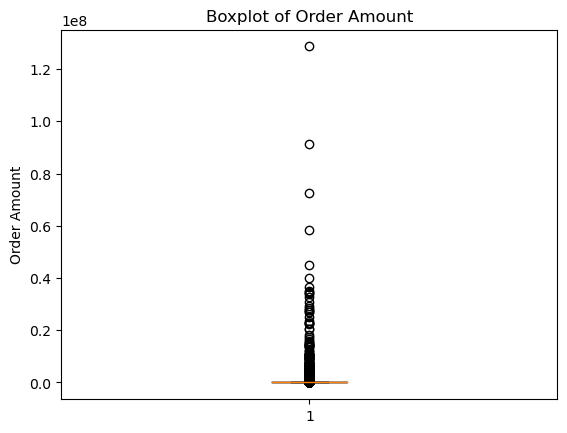

In [27]:
#Create a boxplot on ORDER_AMOUNT to find out the outliers
plt.boxplot(df_m1['ORDER_AMOUNT'])
plt.ylabel('Order Amount')
plt.title('Boxplot of Order Amount')
plt.show()

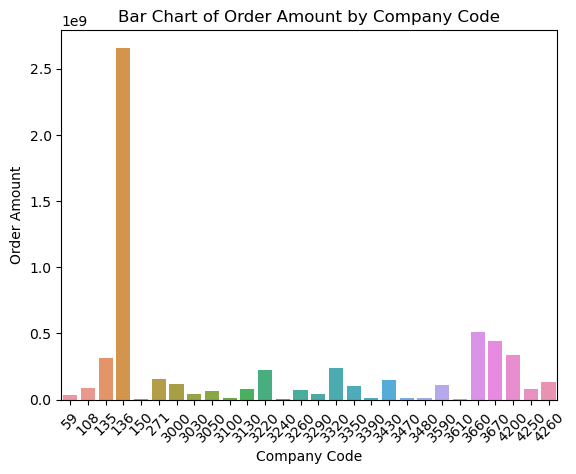

In [28]:
#Create a barchart on COMPANY_CODE and ORDER_AMOUNT
grouped_data = df_m1.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().reset_index()
sns.barplot(data=grouped_data, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code')
plt.ylabel('Order Amount')
plt.title('Bar Chart of Order Amount by Company Code')
plt.xticks(rotation=45)
plt.show()

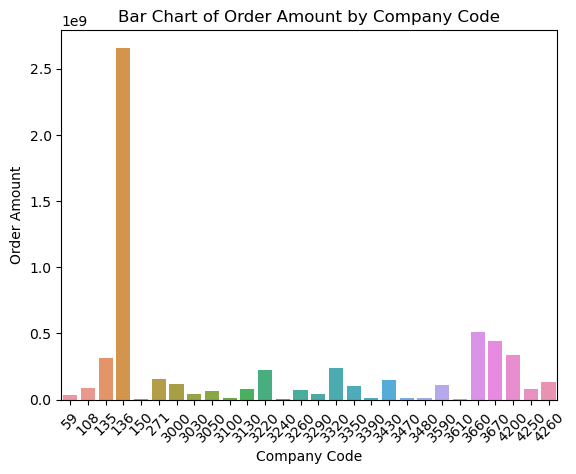

In [29]:
grouped_data = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().reset_index()
sns.barplot(data=grouped_data, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code')
plt.ylabel('Order Amount')
plt.title('Bar Chart of Order Amount by Company Code')
plt.xticks(rotation=45)
plt.show()


# MILESTONE 3

In [30]:
#Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the 
#sessions.
Q1 = df_m1['amount_in_usd'].quantile(0.25)
Q3 = df_m1['amount_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df_m1[(df_m1['amount_in_usd'] < lower_bound) | (df_m1['amount_in_usd'] > upper_bound)]
pre_outliers = len(outliers)
print("Number of outliers before:",pre_outliers)
median = df_m1['amount_in_usd'].median()
df_m1.loc[outliers.index, 'amount_in_usd'] = median
remaining_outliers = df_m1[(df_m1['amount_in_usd'] < lower_bound) | (df_m1['amount_in_usd'] > upper_bound)]
post_outliers = len(remaining_outliers)
print("Number of outliers after:",post_outliers)

Number of outliers before: 101733
Number of outliers after: 0


In [31]:
#Label encoding or One hot Encoding on all the categorical columns
#RELEASED_CREDIT_VALUE it is a continous value but it since it contains a , therefore it is considered as a categorical value
#so I'm converting it in the same way that I converted ORDER_AMOUNT
df_m1['RELEASED_CREDIT_VALUE'] = df_m1['RELEASED_CREDIT_VALUE'].replace(',','.',regex=True)
df_m1['RELEASED_CREDIT_VALUE'] = pd.to_numeric(df_m1['RELEASED_CREDIT_VALUE'], errors="coerce")
#CREDIT_STATUS is stored as a str data type therefore it is considered as a categorical value so converting it into numerical
#value
df_m1['CREDIT_STATUS'] = pd.to_numeric(df_m1['CREDIT_STATUS'], errors="coerce")
#UNIQUE_CUSTOMER_ID is stored as a str data type therefore it is considered as a categorical value so converting it into numerical value
df_m1['unique_cust_id'] = pd.to_numeric(df_m1['unique_cust_id'], errors="coerce")
categorical = []
others = []
for col in df.columns:
    unique_values = df[col].nunique()
    if df[col].dtype == 'object'and unique_values <= 10:  # by looking at df_m1.info()
        categorical.append(col)
    else:
        others.append(col)
one_hot_encoded = pd.get_dummies(df_m1[categorical])
df_m3 = pd.concat([df_m1, one_hot_encoded], axis=1)
#DISTRIBUTION_CHANNEL & PURCHASE_ORDER_TYPE are still categorical but they have too many categories for one hot encoding to
#work and label encoder makes it seem that they have ranking so therefore it will not work as well but for the questions
#sake i'm applying label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_m3['DISTRIBUTION_CHANNEL_ENCODED'] = le.fit_transform(df_m3['DISTRIBUTION_CHANNEL'])
df_m3['PURCHASE_ORDER_TYPE_ENCODED'] = le.fit_transform(df_m3['PURCHASE_ORDER_TYPE'])

In [32]:
#Log Transformations on continuous columns 
import numpy as np
df_m3['amount_in_usd_LOG10'] = np.log10(df_m3['amount_in_usd']+1)# +1 is to deal with zeroes

In [33]:
#Try to extract new features by grouping existing columns 
sales_org_total_amount = df_m3.groupby('SALES_ORG')['amount_in_usd'].sum()
df_m3 = df_m3.merge(sales_org_total_amount, on='SALES_ORG', suffixes=('', '_SALES_ORG_TOTAL'))
distribution_channel_avg_amount = df_m3.groupby('DISTRIBUTION_CHANNEL')['amount_in_usd'].mean()
df_m3 = df_m3.merge(distribution_channel_avg_amount, on='DISTRIBUTION_CHANNEL', suffixes=('', '_DISTRIBUTION_CHANNEL_AVG'))
credit_control_area_sum_credit = df_m3.groupby('CREDIT_CONTROL_AREA')['RELEASED_CREDIT_VALUE'].sum()
df_m3 = df_m3.merge(credit_control_area_sum_credit, on='CREDIT_CONTROL_AREA', suffixes=('', '_CREDIT_CONTROL_AREA_TOTAL'))
customer_total_amount = df_m3.groupby('CUSTOMER_NUMBER')['amount_in_usd'].sum()
df_m3 = df_m3.merge(customer_total_amount, on='CUSTOMER_NUMBER', suffixes=('', '_CUSTOMER_NUMBER_TOTAL'))
purchase_order_type_sum_amount = df_m3.groupby('PURCHASE_ORDER_TYPE')['ORDER_AMOUNT'].sum()
df_m3 = df_m3.merge(purchase_order_type_sum_amount, on='PURCHASE_ORDER_TYPE', suffixes=('', '_PURCHASE_ORDER_TYPE_TOTAL'))
division_total_amount = df_m3.groupby('DIVISION')['amount_in_usd'].sum()
df_m3 = df_m3.merge(division_total_amount, on='DIVISION', suffixes=('', '_DIVISION_TOTAL'))
df_m3 = df_m3.drop(categorical, axis=1)#no longer needed

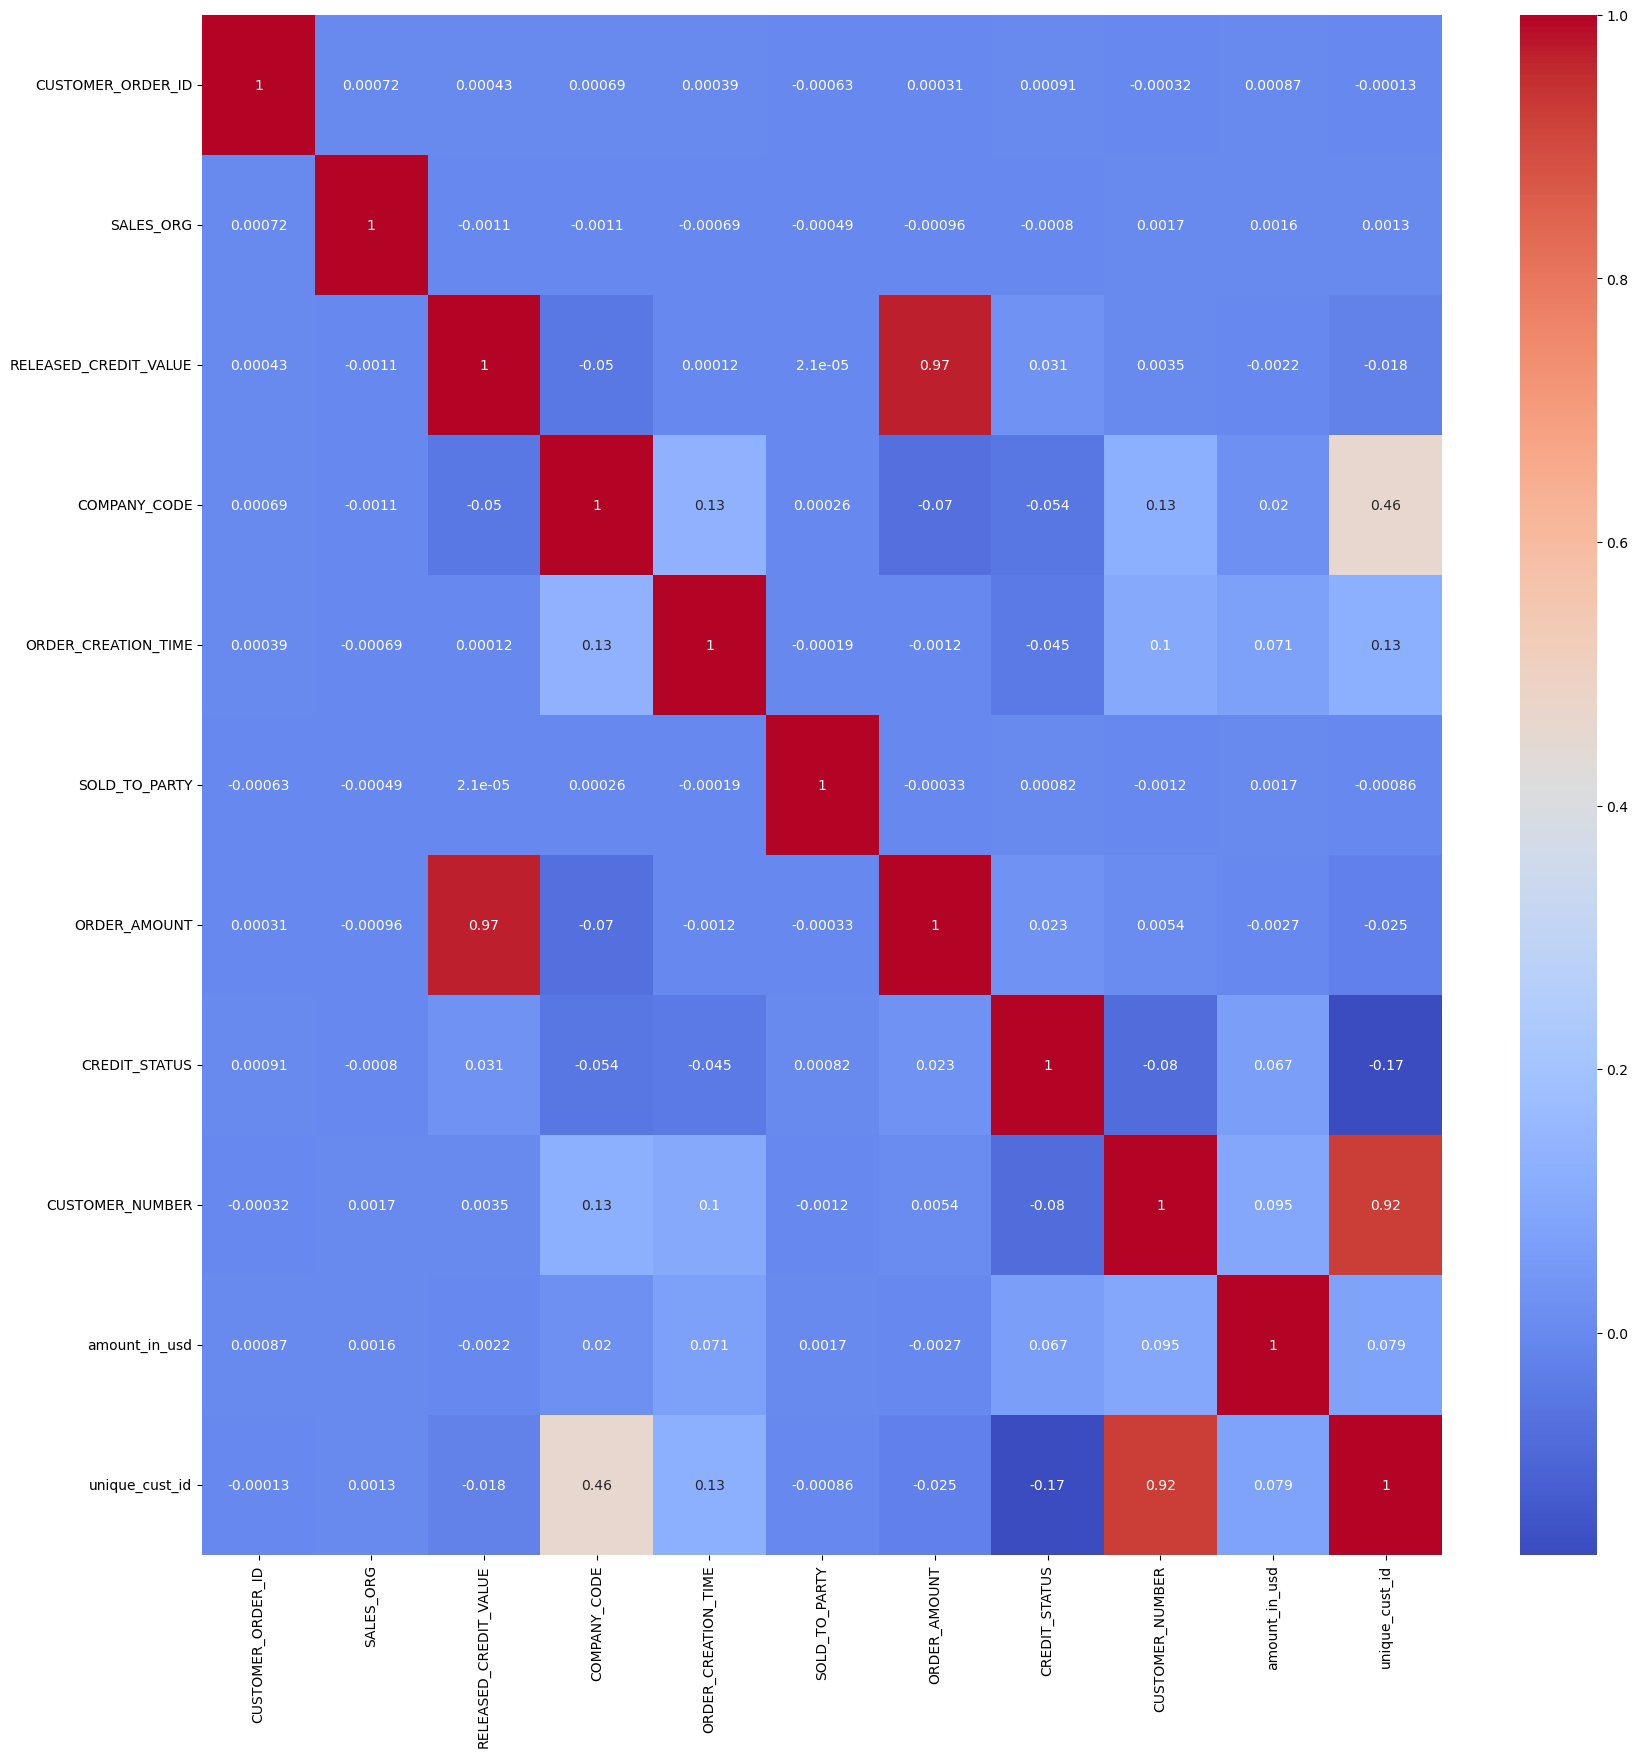

In [34]:
#Create a heatmap to find correlation between the columns
plt.figure(figsize=(20, 20))
sns.heatmap(df_m1.corr(), annot=True, cmap='coolwarm')  #not considering the one hot encoding columns
plt.show()

In [35]:
#Note - All of you Introduce a particular module (Link Attached) for datetime manipulation. 
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-' + str(i) + 'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    melt = melt.reset_index(drop=True)
    for i in range(ffday, lags+1):
        melt['Last-' + str(i) + 'day_Diff'] = melt.groupby([customer_id_col])['Last-' + str(i) + 'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt
df_m3 = difference_in_days(df_m3, lags=3, ffday=1, customer_id_col='CUSTOMER_NUMBER', create_date_col='ORDER_CREATION_DATE', net_amount_col='amount_in_usd')
df_m3.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,...,RELEASED_CREDIT_VALUE_CREDIT_CONTROL_AREA_TOTAL,amount_in_usd_CUSTOMER_NUMBER_TOTAL,ORDER_AMOUNT_PURCHASE_ORDER_TYPE_TOTAL,amount_in_usd_DIVISION_TOTAL,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff
0,946851639,3537,United States of America,0.0,1000,3220,2022-01-01,43012,756141537,954.61,...,4.775736e+08,1.053562e+07,55988243.85,1.279664e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,956989230,3062,United States of America,0.0,1000,3220,2022-01-21,51009,910474893,1230.17,...,4.775736e+08,1.053562e+07,55988243.85,1.279664e+08,1026.462366,0.000000,0.000000,0.000000,0.000000,0.000000
2,968650615,4073,United States of America,0.0,1000,3220,2022-03-16,53905,928332020,618.65,...,4.775736e+08,1.053562e+07,55988243.85,1.279664e+08,1322.763441,1026.462366,0.000000,296.301075,0.000000,0.000000
3,970574045,3524,United States of America,0.0,1000,3220,2022-02-04,55947,926977254,1507.96,...,4.775736e+08,1.053562e+07,55988243.85,1.279664e+08,665.215054,1322.763441,1026.462366,-657.548387,296.301075,0.000000
4,915419994,3375,United States of America,0.0,1000,3220,2022-05-17,55103,803662431,4211.22,...,4.775736e+08,1.053562e+07,55988243.85,1.279664e+08,1621.462366,665.215054,1322.763441,956.247312,-657.548387,296.301075


# MILESTONE 4

In [36]:
df_m4=df_m3

In [37]:
#Modify the dataset to pass into any type of machine learning models. 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
attributes=['ORDER_AMOUNT','ORDER_CURRENCY','DISTRIBUTION_CHANNEL','PURCHASE_ORDER_TYPE','amount_in_usd']
df_m4.drop(attributes,axis=1,inplace=True)
X = df_m4.iloc[:,[0,1,2,3,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35]].values
Y = df_m4.iloc[:,[23]].values#indexes were referred from df_m4.info()
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X = pca.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred = linreg.predict(X_test)  
Y_pred = pd.DataFrame(Y_pred)
print("MSE: ",mean_squared_error(Y_test,Y_pred)," \nR2: ",r2_score(Y_test,Y_pred)," \nRMSE: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

MSE:  1.1688959208148713  
R2:  0.04603295285819986  
RMSE:  1.081154901397053


In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()
dectree.fit(X_train,Y_train)
Y_pred = dectree.predict(X_test)  
Y_pred = pd.DataFrame(Y_pred)
print("MSE: ",mean_squared_error(Y_test,Y_pred)," \nR2: ",r2_score(Y_test,Y_pred)," \nRMSE: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

MSE:  1.2714094605322197  
R2:  -0.037631073198146625  
RMSE:  1.1275679405393804


In [41]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
randfor = RandomForestRegressor()
randfor.fit(X_test,Y_test.ravel())
Y_pred = randfor.predict(X_test)  
Y_pred = pd.DataFrame(Y_pred)
print("MSE: ",mean_squared_error(Y_test,Y_pred)," \nR2: ",r2_score(Y_test,Y_pred)," \nRMSE: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

MSE:  0.10526067642531646  
R2:  0.9140939626176424  
RMSE:  0.3244390180377762


In [42]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, Y_train.ravel())
Y_pred = adaboost.predict(X_test)  
Y_pred = pd.DataFrame(Y_pred)
print("MSE: ",mean_squared_error(Y_test,Y_pred)," \nR2: ",r2_score(Y_test,Y_pred)," \nRMSE: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

MSE:  0.9255352734742417  
R2:  0.2446460491997572  
RMSE:  0.9620474382660357


In [43]:
#Xgboost
import xgboost as xgb
xgbreg = xgb.XGBRegressor()
xgbreg.fit(X_train, Y_train)
Y_pred = xgbreg.predict(X_test)  
Y_pred = pd.DataFrame(Y_pred)
print("MSE: ",mean_squared_error(Y_test,Y_pred)," \nR2: ",r2_score(Y_test,Y_pred)," \nRMSE: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

MSE:  0.6481698683494123  
R2:  0.4710113327074318  
RMSE:  0.8050899753129536


In [ ]:
from sklearn.svm import SVR
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
svm = SVR(kernel='rbf') 
svm.fit(X_train, Y_train.ravel())
Y_pred = svm.predict(X_test)  
Y_pred = pd.DataFrame(Y_pred)
error['SVR']=mean_squared_error(Y_test,Y_pred),r2_score(Y_test,Y_pred),np.sqrt(mean_squared_error(Y_test,Y_pred))
#print("MSE: ",mean_squared_error(Y_test,Y_pred)," \nR2: ",r2_score(Y_test,Y_pred)," \nMAE: ",mean_absolute_error(Y_test,Y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
randfor = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(randfor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train.ravel())
# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Evaluate the best model on the test data
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Best Hyperparameters:", best_params)
print("MSE: ",mse," \nR2: ",r2," \nRMSE: ",rmse)